In [1]:
import os
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import random

from numpy import array
from numpy import hstack

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%config InlineBackend.figure_formatrmat = 'retina'

import optuna

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from stesml.data_tools import get_train_and_test_index
from stesml.data_tools import load_data
from stesml.data_tools import get_train_data
from stesml.data_tools import get_test_data

from stesml.model_tools import get_h_from_T_results
from stesml.model_tools import build_train_test_model

from stesml.plot_tools import get_plot_data
from stesml.plot_tools import plot_test_results
from stesml.plot_tools import plot_average_error
from stesml.plot_tools import plot_progress_results

from stesml.postprocessing_tools import get_Cp
from stesml.postprocessing_tools import get_Ac
from stesml.postprocessing_tools import get_m
from stesml.postprocessing_tools import get_As
from stesml.postprocessing_tools import get_dT_dt

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from sklearn.model_selection import RepeatedKFold

In [4]:
%load_ext tensorboard

In [5]:
import datetime

In [6]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

2022-06-29 11:10:08.242572: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-06-29 11:10:08.242588: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-06-29 11:10:08.242622: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [6]:
n_shuffles = 1
data_dir = "../data/Sulfur_Models/"
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True

parameters = {'n_layers': 5, 'n_hidden_units': 86, 'batch_size': 180, 'epochs': 16}

n_layers = parameters['n_layers']
n_hidden_units = parameters['n_hidden_units']
batch_size = parameters['batch_size']
epochs = parameters['epochs']

rmse = build_train_test_model(data_dir, model_type, target, metric, scale, n_layers, n_hidden_units, batch_size, epochs, n_shuffles=n_shuffles)


2022-06-29 17:39:59.738786: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-29 17:39:59.962019: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/16
11246/11246 [==============================] - 18s 2ms/step - loss: 0.0077 - val_loss: 0.0015
Epoch 2/16
11246/11246 [==============================] - 19s 2ms/step - loss: 3.7853e-05 - val_loss: 8.8953e-04
Epoch 3/16
11246/11246 [==============================] - 19s 2ms/step - loss: 2.4262e-05 - val_loss: 7.4788e-04
Epoch 4/16
11246/11246 [==============================] - 20s 2ms/step - loss: 1.7326e-05 - val_loss: 9.5921e-04
Epoch 5/16
11246/11246 [==============================] - 20s 2ms/step - loss: 1.5026e-05 - val_loss: 8.9546e-04
Result: 1.4655
Average Result: 1.4655
Epoch 1/16
11234/11234 [==============================] - 19s 2ms/step - loss: 0.0061 - val_loss: 0.0026
Epoch 2/16
11234/11234 [==============================] - 19s 2ms/step - loss: 4.7064e-05 - val_loss: 0.0023
Epoch 3/16
11234/11234 [==============================] - 21s 2ms/step - loss: 2.9989e-05 - val_loss: 0.0023
Epoch 4/16
11234/11234 [==============================] - 20s 2ms/step - loss: 2.3

In [49]:
test_df = load_data(scenario_index, test_index)

In [50]:
test_df[target+"_hat"] = y_hat

In [51]:
test_df_plot = get_plot_data(y_hat, test_df, test_index, is_recurrent=False, target=target)

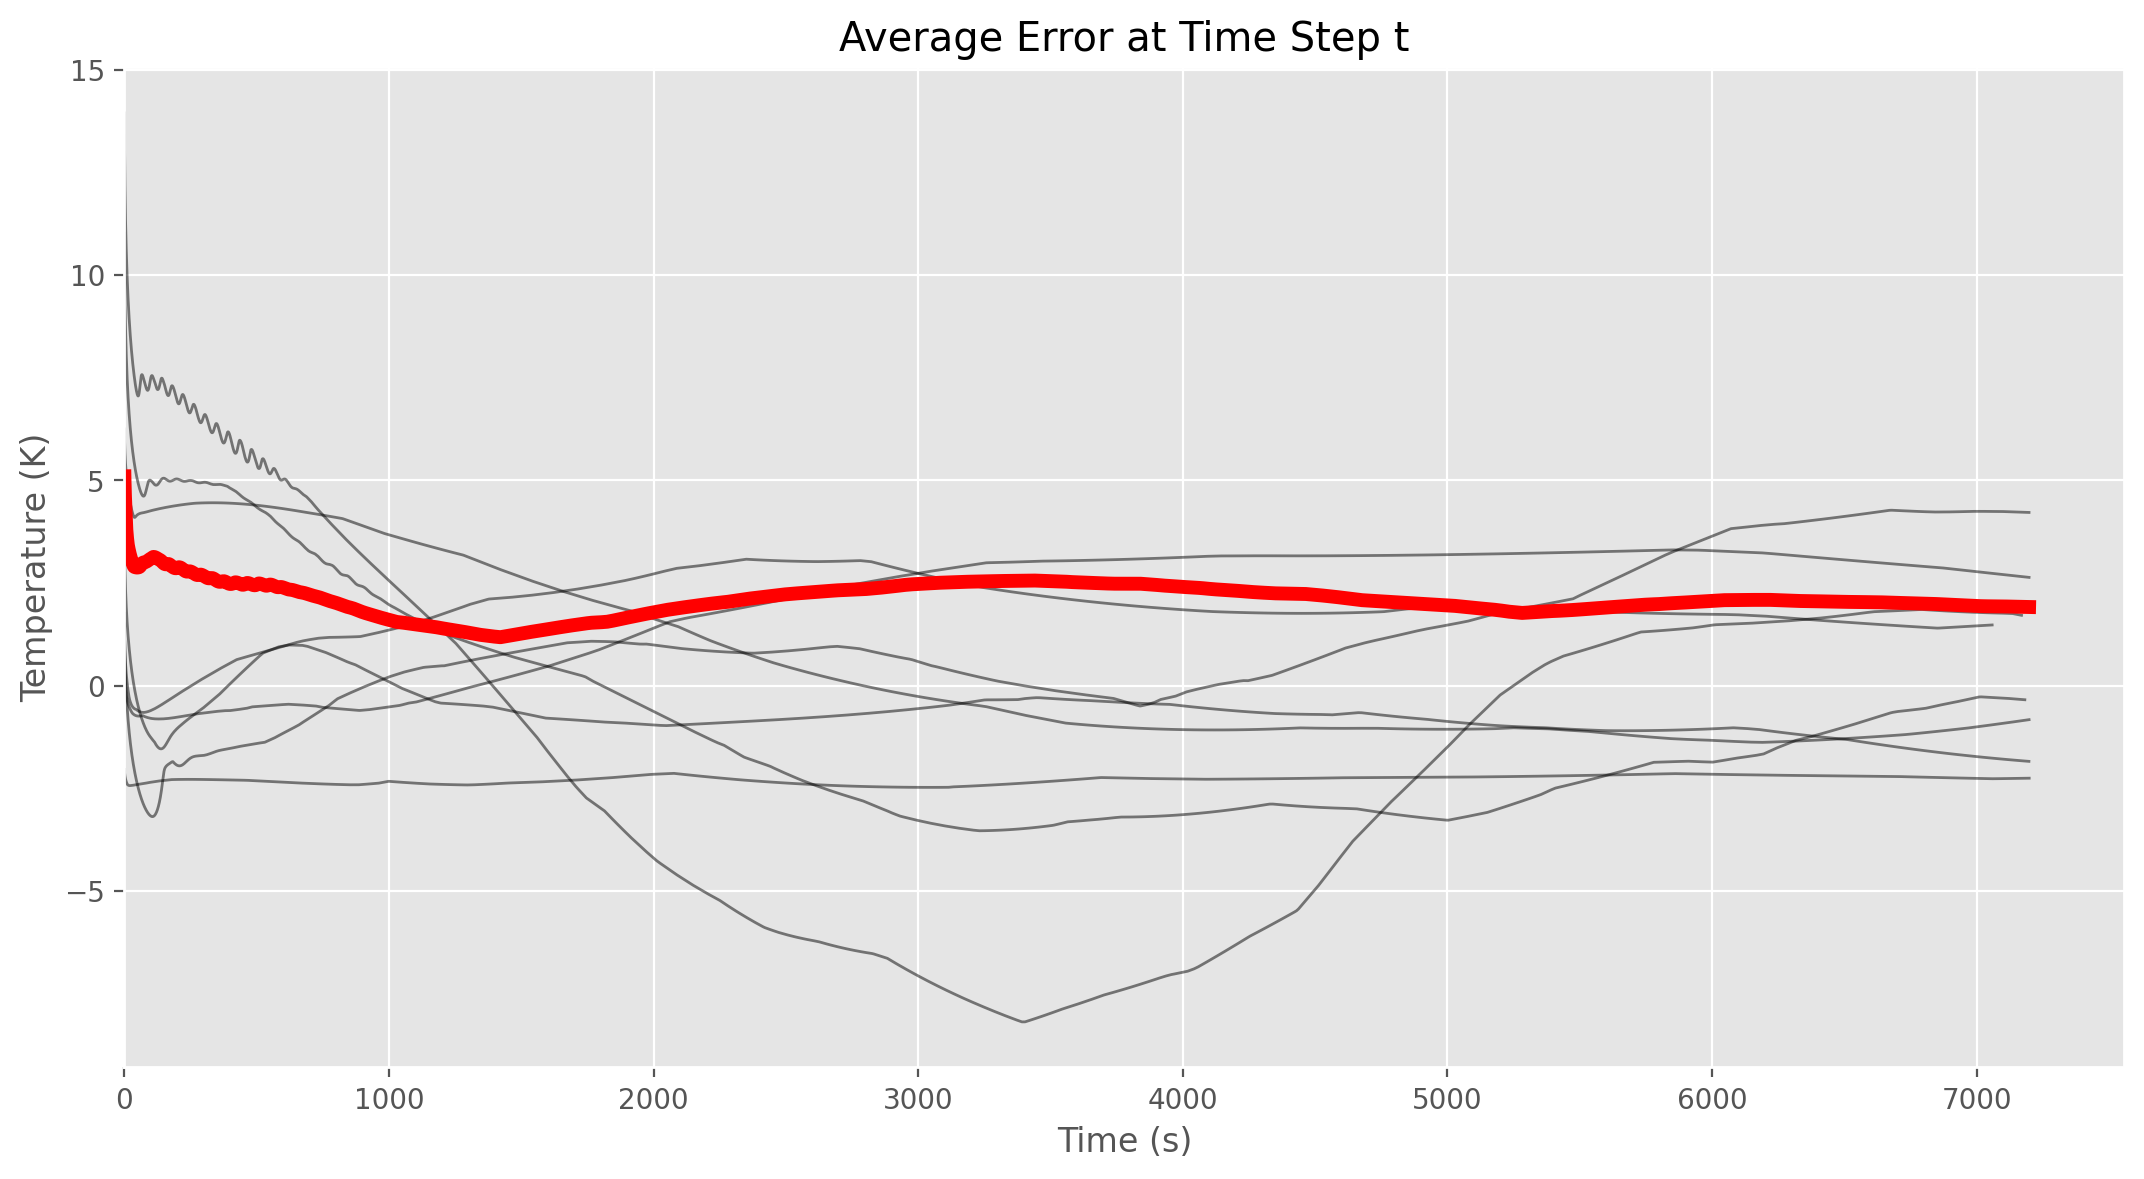

0        5.096813
1        5.096695
2        5.096569
3        5.096363
4        5.095965
           ...   
71995    1.914691
71996    1.914668
71997    1.914649
71998    1.914618
71999    1.914598
Length: 72000, dtype: float64

In [52]:
plot_average_error(test_df_plot, target=target)

<AxesSubplot:>

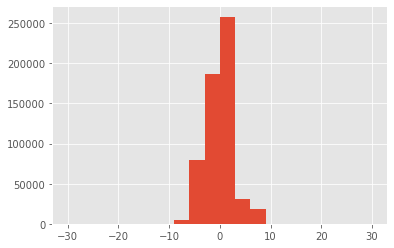

In [53]:
(test_df_plot[target] - test_df_plot[target+'_hat']).hist(bins=20, range=(-30, 30))

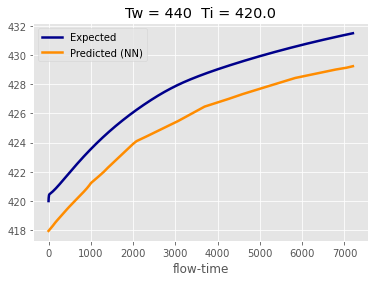

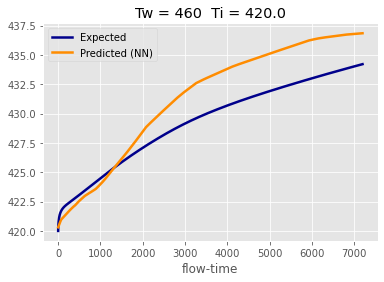

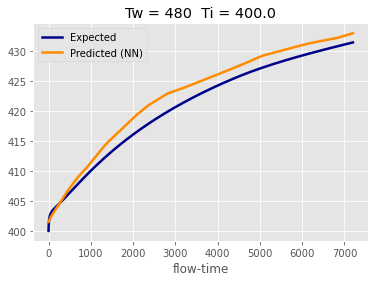

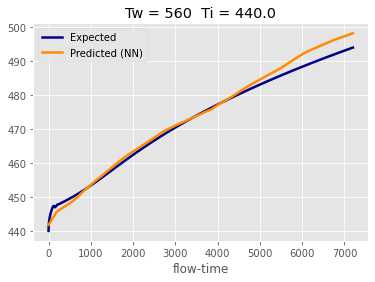

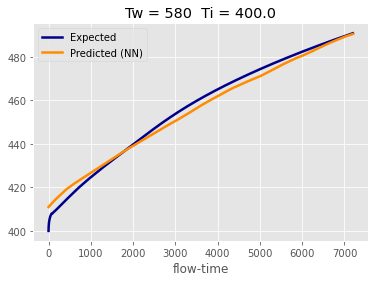

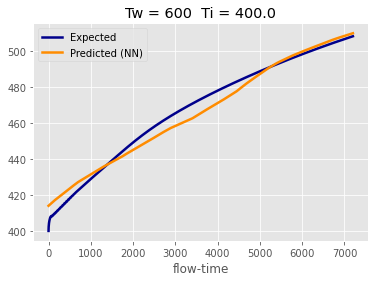

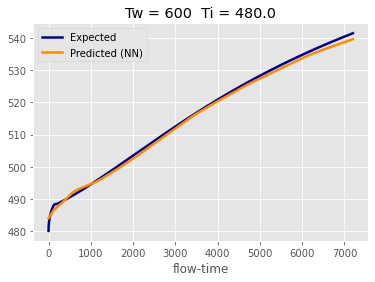

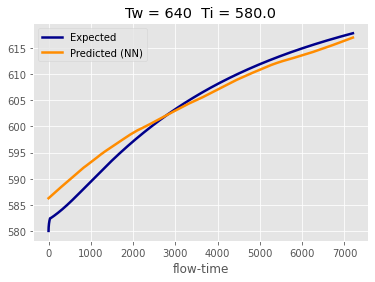

In [54]:
plot_test_results(test_df_plot, model_type='NN', target=target)

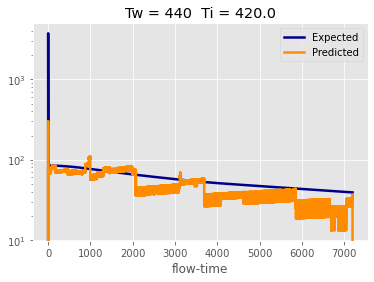

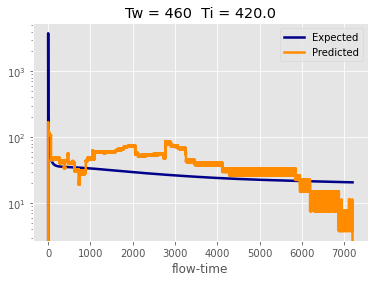

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


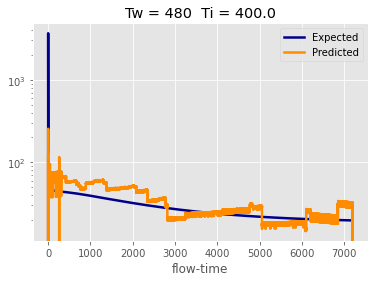

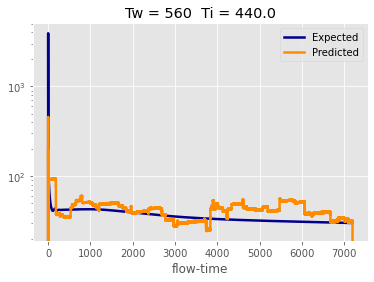

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


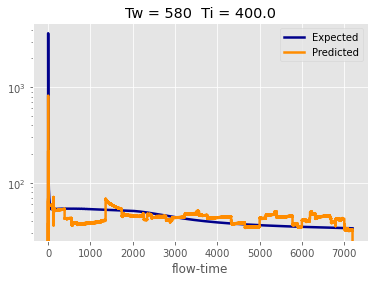

/Users/kmenear/Projects/envSulfurTES/lib/python3.9/site-packages/stesml-0+unknown-py3.9.egg/stesml/postprocessing_tools.py:53: RuntimeWarning: invalid value encountered in true_divide


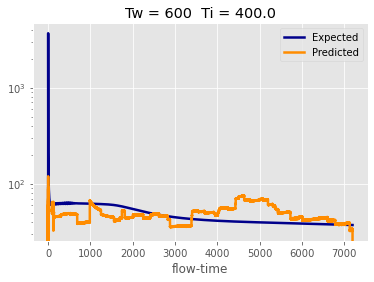

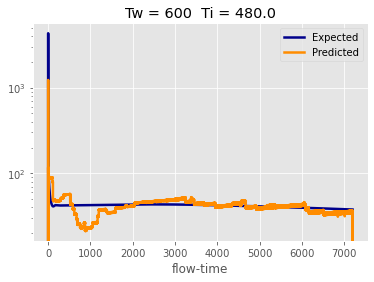

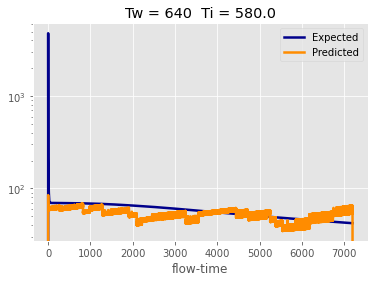

In [55]:
if target == 'Tavg':
    rmse, r2 = get_h_from_T_results(test_df, plot=True)
else:
    rmse, r2 = get_T_from_h_results(test_df, plot=True)

In [56]:
print(rmse)

54.64148278021276


In [57]:
print(r2)

0.026221130386600233
